# Tag Generation Project

###### The training data comprises of various case statements and the tags associated with them. The objective is to devise a model that automatically predicts tags for a given case statement.

In [1]:
import pandas as pd

In [2]:
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [3]:
data = pd.read_csv('tdocf.csv',delimiter=';')

In [4]:
data

,Statement,Tag
0,"\n\nKurian Joseph, J.\n\n1. Leave granted in Special Leave Petition (Civil) No. 12495 of 2015\n\n2. Around 46.93 acres of Land was acquired by the Respondent-State of Haryana initiating the proceedings by Notification dated 19.09.1983 issued Under Section 4 of the Land Acquisition Act, 1894. The...",Cause of Action
1,"\n\nAbhay Manohar Sapre, J.\n\n1. Delay in filing special leave petition is condoned. Leave granted.\n\n2. This appeal is filed against the final judgment and order dated 08.04.2015 of the High Court of Judicature at Patna in CWJC No. 5402 of 2015 whereby the High Court while disposing of the Ap...","Abetment, Abetment of Suicide, Absconding, Accidental Death, Apprehension, Documentary Evidence, Dowry Death, Interested Witness, Post"
2,"\n\nPinaki Chandra Ghose, J.\n\n1. This criminal appeal, by special leave, is directed against the impugned common judgment dated June 17, 2009 of the High Court of Gujarat whereby the High Court dismissed Criminal Appeal No. 1327 of 2004 filed by the Appellants and confirmed the order passed by...","Decision, Exemption, Exemption Notification, Import, Importer, India, Larger Bench, Notification, Order, Order of Reference, Reference, Statement"
3,"\n\n1. This matter is placed before us as a Bench of this Court differed from the view expressed by another Bench in Mediwell Hospital and Health Care Pvt. Ltd. v. Union of India and Ors., MANU/SC/1378/1997MANU/SC/1378/1997 : 1997(89)ELT425(SC) insofar as it imposes a condition to avail of the b...","Child Labour, Compensation, Fundamental Right, Liberty, Mandamus, Sexual Harassment, Union Territories, Writ of Mandamus"
4,"\n\n1. We have heard learned Counsel for the parties. The prayer made in this writ petition is as follows:\n\n""1. Issue a writ of mandamus or any other appropriate writ, order or direction, directing the Respondents to frame appropriate guidelines for the persons engaged in circuses;\n\n2. Issue...","Account, Auditor, Authentication, Commercial, Consent, Direction, Dispute, Due, Generating Station, National Commission, Rate, Tariff"
...,...,...
75,"\n\n1. This is tenant's appeal by special leave. Though the appeals are three in number, the subject matter is one common judgment and therefore, the three are being treated as one appeal. The suit premises are situated in the city of Pune and governed by the provisions of The Bombay Rents, Hote...","Administration of Justice, Admiralty Jurisdiction, Allowance, Arbitrariness, Basic Feature, Chief Justice of India, Compensation, Composition, Conditions of Service, Constitution of India, Contempt, Contract, Contravention, Court Fee, District Judge, Give Effect To, Interim Order, Interpretation..."
76,"\n\nS.B. Sinha, J.\n\n1. The primal question involved in this batch of appeals and the Writ Petitions is the constitutionality of the Consumer Protection Act, 1986 (hereinafter called ""the Act"").\n\n2. civil Appeals No. 4613 and 4614 of 1999 filed by Vishwabharathi House Building Cooperative Soc...","Absorption, Ad"
77,"\n\nR. Banumathi, J.\n\n1. Leave granted.\n\n2. This appeal by special leave arises out of the order dated 20.02.2013 passed by the High Court of Judicature at Patna in LPA No. 1312 of 2012 which was dismissed in limine by the High Court, whereby the order of the learned Single Judge was confirm...","Appreciation of Evidence, Assault, Autopsy, Breach of Trust, Commission of Offence, Constitution of India, Criminal Breach of Trust, Death Sentence, Distinct Offence, Dowry Death, Framing of Charge, Stridhan"
78,"\n\nDipak Misra, J.\n\n1. Despite completion of a decade from the date of solemnisation of the marriage and in spite of two off springs in the wedlock, neither the time nor the expansion of family nor the concern for the children could cement the bond or weld the affinity between the Appellant-h...","Amicus Curiae, Circumstantial Evidence, Eye Witness, Imprisonment for Life, Juvenile Offender, Malice, Motor Vehicle Accident, Negligent Dri

In [5]:
type(data['Tag'][0])

str

In [6]:
data.Tag[1]

'Abetment, Abetment of Suicide, Absconding, Accidental Death, Apprehension, Documentary Evidence, Dowry Death, Interested Witness, Post'

In [7]:
for i in range(0,80):
    tag = data.loc[i,'Tag'] 
    tag = tag.split(',')           #splitting strings into list based on comma
    data.loc[i,'Tag']=tag          #equating the Tag column with list

In [8]:
type(data['Tag'][0])

list

In [9]:
data

,Statement,Tag
0,"\n\nKurian Joseph, J.\n\n1. Leave granted in Special Leave Petition (Civil) No. 12495 of 2015\n\n2. Around 46.93 acres of Land was acquired by the Respondent-State of Haryana initiating the proceedings by Notification dated 19.09.1983 issued Under Section 4 of the Land Acquisition Act, 1894. The...",[Cause of Action]
1,"\n\nAbhay Manohar Sapre, J.\n\n1. Delay in filing special leave petition is condoned. Leave granted.\n\n2. This appeal is filed against the final judgment and order dated 08.04.2015 of the High Court of Judicature at Patna in CWJC No. 5402 of 2015 whereby the High Court while disposing of the Ap...","[Abetment, Abetment of Suicide, Absconding, Accidental Death, Apprehension, Documentary Evidence, Dowry Death, Interested Witness, Post]"
2,"\n\nPinaki Chandra Ghose, J.\n\n1. This criminal appeal, by special leave, is directed against the impugned common judgment dated June 17, 2009 of the High Court of Gujarat whereby the High Court dismissed Criminal Appeal No. 1327 of 2004 filed by the Appellants and confirmed the order passed by...","[Decision, Exemption, Exemption Notification, Import, Importer, India, Larger Bench, Notification, Order, Order of Reference, Reference, Statement]"
3,"\n\n1. This matter is placed before us as a Bench of this Court differed from the view expressed by another Bench in Mediwell Hospital and Health Care Pvt. Ltd. v. Union of India and Ors., MANU/SC/1378/1997MANU/SC/1378/1997 : 1997(89)ELT425(SC) insofar as it imposes a condition to avail of the b...","[Child Labour, Compensation, Fundamental Right, Liberty, Mandamus, Sexual Harassment, Union Territories, Writ of Mandamus]"
4,"\n\n1. We have heard learned Counsel for the parties. The prayer made in this writ petition is as follows:\n\n""1. Issue a writ of mandamus or any other appropriate writ, order or direction, directing the Respondents to frame appropriate guidelines for the persons engaged in circuses;\n\n2. Issue...","[Account, Auditor, Authentication, Commercial, Consent, Direction, Dispute, Due, Generating Station, National Commission, Rate, Tariff]"
...,...,...
75,"\n\n1. This is tenant's appeal by special leave. Though the appeals are three in number, the subject matter is one common judgment and therefore, the three are being treated as one appeal. The suit premises are situated in the city of Pune and governed by the provisions of The Bombay Rents, Hote...","[Administration of Justice, Admiralty Jurisdiction, Allowance, Arbitrariness, Basic Feature, Chief Justice of India, Compensation, Composition, Conditions of Service, Constitution of India, Contempt, Contract, Contravention, Court Fee, District Judge, Give Effect To, Interim Orde..."
76,"\n\nS.B. Sinha, J.\n\n1. The primal question involved in this batch of appeals and the Writ Petitions is the constitutionality of the Consumer Protection Act, 1986 (hereinafter called ""the Act"").\n\n2. civil Appeals No. 4613 and 4614 of 1999 filed by Vishwabharathi House Building Cooperative Soc...","[Absorption, Ad]"
77,"\n\nR. Banumathi, J.\n\n1. Leave granted.\n\n2. This appeal by special leave arises out of the order dated 20.02.2013 passed by the High Court of Judicature at Patna in LPA No. 1312 of 2012 which was dismissed in limine by the High Court, whereby the order of the learned Single Judge was confirm...","[Appreciation of Evidence, Assault, Autopsy, Breach of Trust, Commission of Offence, Constitution of India, Criminal Breach of Trust, Death Sentence, Distinct Offence, Dowry Death, Framing of Charge, Stridhan]"
78,"\n\nDipak Misra, J.\n\n1. Despite completion of a decade from the date of solemnisation of the marriage and in spite of two off springs in the wedlock, neither the time nor the expansion of family nor the concern for the children could cement the bond or weld the affinity between the Appellant-h...","[Amicus Curiae, Circumstantial Evidence, Eye Witness, Imprisonment for Life, Juvenile Offender, Malice, Motor Vehicle Accident, Negligent Driv

### Analysis of Tags

In [10]:
df1 = []
for i in range(data.shape[0]):
    for j in data['Tag'][i]:
        df1.append(j)                      #making a list of all tags in dataset

In [11]:
df1

['Cause of Action',
 'Abetment',
 ' Abetment of Suicide',
 ' Absconding',
 ' Accidental Death',
 ' Apprehension',
 ' Documentary Evidence',
 ' Dowry Death',
 ' Interested Witness',
 ' Post',
 'Decision',
 ' Exemption',
 ' Exemption Notification',
 ' Import',
 ' Importer',
 ' India',
 ' Larger Bench',
 ' Notification',
 ' Order',
 ' Order of Reference',
 ' Reference',
 ' Statement',
 'Child Labour',
 ' Compensation',
 ' Fundamental Right',
 ' Liberty',
 ' Mandamus',
 ' Sexual Harassment',
 ' Union Territories',
 ' Writ of Mandamus',
 'Account',
 ' Auditor',
 ' Authentication',
 ' Commercial',
 ' Consent',
 ' Direction',
 ' Dispute',
 ' Due',
 ' Generating Station',
 ' National Commission',
 ' Rate',
 ' Tariff',
 'Admission',
 ' Adoption',
 ' Adoptive Parent',
 ' Age',
 ' Compromise',
 ' Custody',
 ' Declaration',
 ' Family',
 ' Father',
 " Father's Right",
 ' Female',
 ' Given in Adoption',
 ' Guardianship',
 ' Hindu',
 ' Illegitimate Child',
 ' Indifference',
 ' Maintenance',
 ' Marria

In [12]:
tag_unique = list(dict.fromkeys(df1))      #forming a list of all unique values of tag (no repetition of values)
print(tag_unique)

['Cause of Action', 'Abetment', ' Abetment of Suicide', ' Absconding', ' Accidental Death', ' Apprehension', ' Documentary Evidence', ' Dowry Death', ' Interested Witness', ' Post', 'Decision', ' Exemption', ' Exemption Notification', ' Import', ' Importer', ' India', ' Larger Bench', ' Notification', ' Order', ' Order of Reference', ' Reference', ' Statement', 'Child Labour', ' Compensation', ' Fundamental Right', ' Liberty', ' Mandamus', ' Sexual Harassment', ' Union Territories', ' Writ of Mandamus', 'Account', ' Auditor', ' Authentication', ' Commercial', ' Consent', ' Direction', ' Dispute', ' Due', ' Generating Station', ' National Commission', ' Rate', ' Tariff', 'Admission', ' Adoption', ' Adoptive Parent', ' Age', ' Compromise', ' Custody', ' Declaration', ' Family', ' Father', " Father's Right", ' Female', ' Given in Adoption', ' Guardianship', ' Hindu', ' Illegitimate Child', ' Indifference', ' Maintenance', ' Marriage', ' Mental Incapacity', ' Minority', ' Mohammedan', ' Na

In [13]:
len(tag_unique)   #finding number of unique tags.

1322

In [14]:
tag_unique = nltk.FreqDist(df1) 

# creating dataframe of each tag and their occurences in dataset
tag_unique_df = pd.DataFrame({'Tag': list(tag_unique.keys()), 
                              'Occurences': list(tag_unique.values())})

In [15]:
tag_unique_df = tag_unique_df.sort_values('Occurences',
                                     ascending=False)

In [16]:
tag_unique_df

,Tag,Occurences
77,Appeal,13
221,Constitution of India,13
23,Compensation,13
119,Information,11
173,Case,11
...,...,...
592,Accommodation,1
595,Attornment,1
596,Bona Fide Requirement,1
599,Contract of Tenancy,1


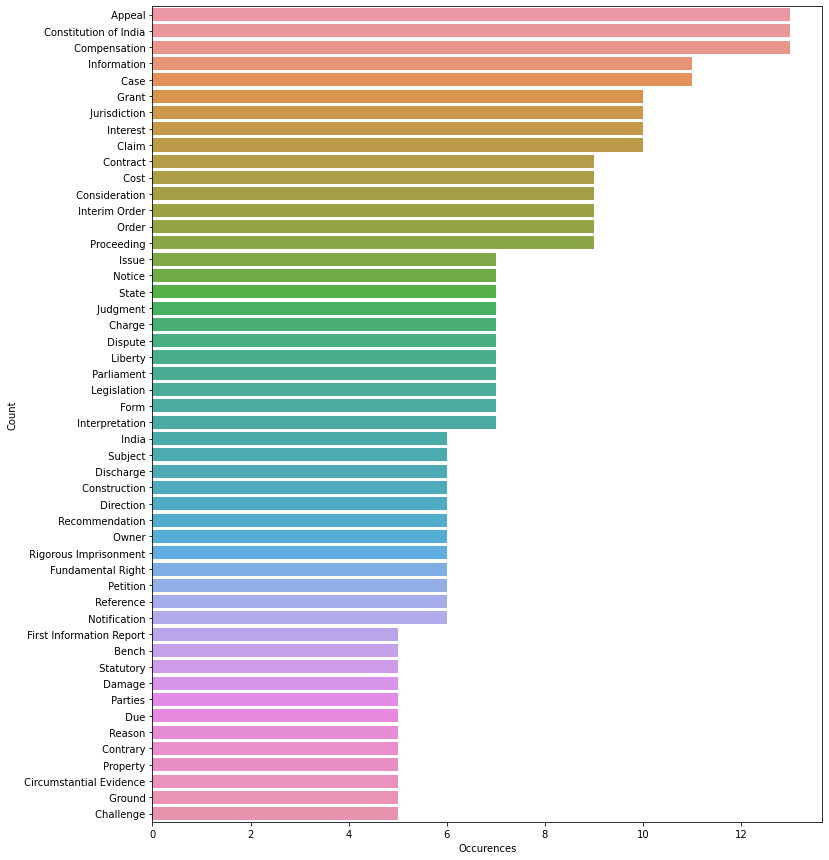

In [17]:
# a bar graph depicting the most used tags
t =tag_unique_df.nlargest(columns="Occurences", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=t, x= "Occurences", y = "Tag") 
ax.set(ylabel = 'Count') 
plt.show()

### Data Cleaning

In [18]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [19]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

In [20]:
data['Statement'] = data['Statement'].apply(lambda x: clean_text(x))

In [21]:
data['Statement'] = data['Statement'].apply(lambda x: remove_stopwords(x))

In [22]:
data['Statement'][0:3]

0    kurian joseph j leave granted special leave petition civil around acres land acquired respondent state haryana initiating proceedings notification dated issued section land acquisition act purpose acquisition residential commercial panchkula sector acquired property village fatehpur respect deve...
1    abhay manohar sapre j delay filing special leave petition condoned leave granted appeal filed final judgment order dated high court judicature patna cwjc whereby high court disposing appellants writ petition granted liberty file representation national thermal power corporation ntpc time passed ...
2    pinaki chandra ghose j criminal appeal special leave directed impugned common judgment dated june high court gujarat whereby high court dismissed criminal appeal filed appellants confirmed order passed trial court high court present matter upheld sentence awarded trial court stating evidence led...
Name: Statement, dtype: object

### Vectorization and Splitting data into Training and Validation Set

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(data['Tag'])

# transform target variable 
y = multilabel_binarizer.transform(data['Tag'])

In [24]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [25]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(data['Statement'], y, test_size=0.025, random_state=1)

In [26]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)   #vectorizing the words in dataset

In [27]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

### Model Training

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [29]:
#hyperparameter tuning
alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
penalty=['l1','l2']
params  = {"estimator__C":alpha,
           "estimator__penalty":penalty}
base_estimator = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
rsearch_cv = RandomizedSearchCV(estimator=base_estimator, param_distributions=params, n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1, verbose=0)
# model fitting
rsearch_cv.fit(xtrain_tfidf, ytrain)

C:\Users\PC\anaconda3\envs\PythonCPU\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.01705919        nan 0.00200921 0.                nan
        nan        nan 0.         0.01659348]
  category=UserWarning


RandomizedSearchCV(cv=5,
                   estimator=OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced'),
                                                 n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'estimator__C': [1e-06, 1e-05, 0.0001,
                                                         0.001, 0.01, 0.1, 1,
                                                         10, 100, 1000, 10000],
                                        'estimator__penalty': ['l1', 'l2']},
                   scoring='f1_micro')

In [30]:
# a function for all new datasets
def infer_tag(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = rsearch_cv.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [31]:
# printing results for validation dataset that has 2 entries.
for i in range(2): 
  k = xval.sample(1).index[0] 
  print( "\nPredicted Tag: ", infer_tag(xval[k])), print("Actual Tag: ",data['Tag'][k], "\n")



Predicted Tag:  [(' Accounts', ' Administrative', ' Against Any Liability', ' Allowance', ' Amending Act', ' Amendment', ' Any Order', ' Any Person', ' Appeal', ' Application', ' Appropriate', ' Association', ' Attorney General', ' Authority', ' Award', ' Basic Feature', ' Bench', ' Board', ' Bodily Injury', ' Book', ' Books', ' Carriage', ' Case', ' Census', ' Central Government', ' Certificate Of Insurance', ' Challenge', ' Charge', ' Civil Appeal', ' Civil Court', ' Claim', ' Commercial', ' Commissioner', ' Competent Authority', ' Concern', ' Conduct', ' Conductor', ' Consent', ' Constitution of India', ' Construction', ' Contentions', ' Contractual Liability', ' Control', ' Conviction under', ' Copy', ' Corporation', ' Corroboration', ' Cost', ' Credit', ' Cross', ' Date Of', ' Date Of Expiry', ' Death', ' Debt', ' Defamation', ' Development', ' Discharge', ' Disqualification', ' Division', ' Division Bench', ' Driving', ' Due', ' Duty', ' Employment', ' Evidence', ' Excise Duty',

In [32]:
# Evaluation metrics
import sklearn.metrics
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predictions = rsearch_cv.predict(xval_tfidf)
recall = recall_score(yval, predictions, average='micro' )

 
print("\nMicro-average quality numbers")
print("\nRecall: {:.4f}".format( recall))


Micro-average quality numbers

Recall: 0.2727


### Working on Test Dataset

In [33]:
test = pd.read_csv("test.csv",encoding = 'latin-1')

In [34]:
test

,Statement
0,"\n\nP. Venkatarama Reddi, J.\n\n1. The opinion recorded by the Kerala High Court in ITR No. 16 of 1997 has given rise to this appeal filed by the Chief Commissioner of Income-tax. The dispute relates to the assessment year 1985-86. At the instance of the Revenue the following question was referr..."
1,"\n\nG.B. Pattanaik, J.\n\n1. This batch of Special Leave Petitions are by the State of Tamil Nadu, directed against the Judgment of the Division Bench of Madras High Court, dealing with the licensing system for retail vending of Indian made foreign liquor. The Excise Year is for the period of 1s..."
2,"\n\n1. After hearing the Learned Counsel for both the parties at length, we find ourselves in agreement with the view taken by the Customs, Excise & Service Tax Appellate Tribunal (hereinafter referred to as 'CESTAT') in the impugned judgment [2006 (204) E.L.T. 61 (Tribunal)] that the product of..."
3,"\n\n1. This appeal is directed against the judgment and order passed by the High Court of Karnataka in Criminal Appeal No. 473 of 2002, dated 28.02.2008, whereby and where under the High Court has set aside the judgment and order of acquittal passed by the Trial Court in SPL.C.C. No. 47 of 2000...."
4,"\n\n1. An issue raised by the appellants was that the search was conducted both in their shop and in their house and that the search warrant was limited to the shop. The Panchas to the search were, therefore, material witnesses in this behalf. That they were not produced for cross-examination, t..."
...,...
96,"\n\nVikramajit Sen, J.\n\n1. This Appeal assails the judgment dated 19.4.2006 of the Securities Appellate Tribunal which upheld the order of the Securities and Exchange Board of India dated 1.8.2003. The factual matrix is that one Mr. V.P. Garg (hereinafter referred to as 'Garg') entered into an..."
97,"\n\nAnil R. Dave, J.\n\n1. Leave granted.\n\n2. In view of the relation among the parties inter se, in our opinion, the ends of justice would be met if a sum of Rs. 3 lakhs is paid by the accused to the victim-complainant. We are informed that a sum of Rs. 2 lakhs has already been deposited with..."
98,"\n\nAnil R. Dave, J.\n\n1 This appeal has been filed against the judgment delivered on 16th November, 2005 in R.S.A. No. 578 of 2000 by the High Court of Karnataka at Bangalore.\n\n2. The facts giving rise to the present Appeal, in a nutshell, are as under:\n\nThe Appellant is the original Defen..."
99,"\n\n1. By this interlocutory application, Mr. Jose Sabastin had prayed for the following reliefs:\n\n(i) Issue an interim direction directing to the second Respondent to give an appropriate compensation of the 1st applicants family as this Hon'ble Court deem fit as there is no other provision to..."


In [35]:
test_val = test['Statement']

In [36]:
test['Tag'] = ''

In [37]:
test

,Statement,Tag
0,"\n\nP. Venkatarama Reddi, J.\n\n1. The opinion recorded by the Kerala High Court in ITR No. 16 of 1997 has given rise to this appeal filed by the Chief Commissioner of Income-tax. The dispute relates to the assessment year 1985-86. At the instance of the Revenue the following question was referr...",
1,"\n\nG.B. Pattanaik, J.\n\n1. This batch of Special Leave Petitions are by the State of Tamil Nadu, directed against the Judgment of the Division Bench of Madras High Court, dealing with the licensing system for retail vending of Indian made foreign liquor. The Excise Year is for the period of 1s...",
2,"\n\n1. After hearing the Learned Counsel for both the parties at length, we find ourselves in agreement with the view taken by the Customs, Excise & Service Tax Appellate Tribunal (hereinafter referred to as 'CESTAT') in the impugned judgment [2006 (204) E.L.T. 61 (Tribunal)] that the product of...",
3,"\n\n1. This appeal is directed against the judgment and order passed by the High Court of Karnataka in Criminal Appeal No. 473 of 2002, dated 28.02.2008, whereby and where under the High Court has set aside the judgment and order of acquittal passed by the Trial Court in SPL.C.C. No. 47 of 2000....",
4,"\n\n1. An issue raised by the appellants was that the search was conducted both in their shop and in their house and that the search warrant was limited to the shop. The Panchas to the search were, therefore, material witnesses in this behalf. That they were not produced for cross-examination, t...",
...,...,...
96,"\n\nVikramajit Sen, J.\n\n1. This Appeal assails the judgment dated 19.4.2006 of the Securities Appellate Tribunal which upheld the order of the Securities and Exchange Board of India dated 1.8.2003. The factual matrix is that one Mr. V.P. Garg (hereinafter referred to as 'Garg') entered into an...",
97,"\n\nAnil R. Dave, J.\n\n1. Leave granted.\n\n2. In view of the relation among the parties inter se, in our opinion, the ends of justice would be met if a sum of Rs. 3 lakhs is paid by the accused to the victim-complainant. We are informed that a sum of Rs. 2 lakhs has already been deposited with...",
98,"\n\nAnil R. Dave, J.\n\n1 This appeal has been filed against the judgment delivered on 16th November, 2005 in R.S.A. No. 578 of 2000 by the High Court of Karnataka at Bangalore.\n\n2. The facts giving rise to the present Appeal, in a nutshell, are as under:\n\nThe Appellant is the original Defen...",
99,"\n\n1. By this interlocutory application, Mr. Jose Sabastin had prayed for the following reliefs:\n\n(i) Issue an interim direction directing to the second Respondent to give an appropriate compensation of the 1st applicants family as this Hon'ble Court deem fit as there is no other provision to...",


In [38]:
for i in range(0,101):
    test['Tag'][i] = infer_tag(test_val[i])

In [39]:
result = test['Tag']

In [40]:
result.to_csv('test_tag.csv',index=False)

In [41]:
x = pd.read_csv('test_tag.csv')